# 컴퓨터 정보의 단위
- 비트: 2진수를 이용
    - 바이트: 8비트로 구성
    - 킬로바이트(KiB): 1024바이트
    - 메가바이트(MiB): 1024킬로바이트
    - 기가바이트(GiB): 1024메가바이트
    - 테라바이트(TiB): 1024기가바이트
- 워드(Word): CPU가 한 번에 처리할 수 있는 데이터의 크기
    - 32비트 시스템: 4바이트 워드
    - 64비트 시스템: 8바이트 워드

# 데이터 - 0과 1로 숫자 표현하기
- 2진수와 16진수
    - 2진수는 숫자 1이 넘어가는 시점에 자리 올림을 하여, 0,1,2만으로 모든 수를 표현 -> 0b로 시작하는 숫자
    - 16진수는 숫자 15가 넘어가는 시점에 자리 올림을 하여, 0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F로 모든 수를 표현 -> 0x로 시작하는 숫자

In [1]:
a = 0.1
b = 0.2
c = 0.3

if a + b == c:
    print("Equal")
else:
    print("Not Equal")

Not Equal


- 부동소수점 (IEEE 754)
    - 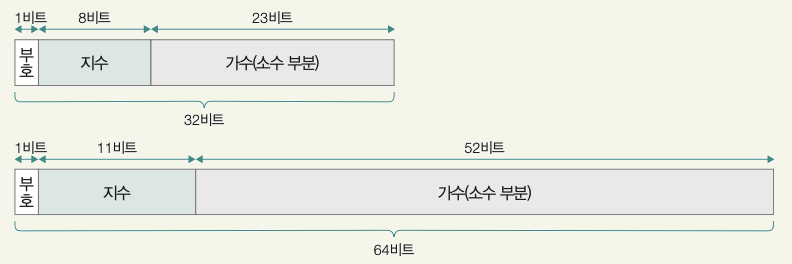
    - 1.123 * 10^2라고 할 때, 1.123는 가수, 2는 지수
    - 2진수에서는 m * 2^n 꼴로 표현됨
    - 10진수 소수를 2진수로 표현이 딱 맞아 떨어지지 않아, 위 코드에서 "Not Equal"이 출력됨

In [2]:
import struct

packed = struct.pack('>f', 107.6640625)
binary_str = ''.join(f'{byte:08b}' for byte in packed)
print("16진수: "+packed.hex())
# 책 50페이지의 그림을 참고하여, 107.6640625를 IEEE 754로 표현한 결과
print("2진수: "+binary_str)

16진수: 42d75400
2진수: 01000010110101110101010000000000


# 데이터 - 0과 1로 문자 표현하기
- 문자 인코딩: 문자를 컴퓨터가 이해할 수 있는 이진수 형태로 변환하는 과정
    - 글자 깨짐 등의 현상은, 인코딩 방법의 불일치 등으로 인해 발생
- ASCII: 7비트로 표현되는 문자 인코딩 (1비트는 패리티 비트로 사용)
    - 128개의 문자(영문 대소문자, 숫자, 특수문자 등)를 표현
    - 예: 'A'는 65, 'a'는 97, '0'은 48
- EUC-KR: 한국어 문자 인코딩
    - 한글을 표현하기 위해 2바이트를 사용
    - 한글 자모를 조합하여 완성된 글자를 표현
    - 2350개 정도의 한글 단어 표현 가능

In [3]:
a = '한'.encode('euc-kr')
b = '글'.encode('euc-kr')

print(a.hex())
print(b.hex())

c7d1
b1db


- 유니코드: 다국어 문자 인코딩
    - 훨씬 많은 문자를 표현할 수 있는 인코딩 방식
    - UTF-8, UTF-16, UTF-32 등 다양한 변형이 있음
        - UTF-8: 가변 길이 인코딩, ASCII와 호환
        - UTF-16: 2바이트 또는 4바이트로 표현, 한글과 같은 다국어 문자에 적합
        - UTF-32: 4바이트로 모든 문자를 표현, 메모리 사용량이 많음
    - 유니코드 문자에 부여된 값을 가변길이 인코딩하여, 문자를 표현
        - 같은 문자라하더라도, 인코딩 방식에 따라 다른 값으로 표현될 수 있음

In [4]:
a8 = '한'.encode('utf-8')
b8 = '글'.encode('utf-8')
print('utf-8 한:', a8.hex())
print('utf-8 글:', b8.hex())

a16 = '한'.encode('utf-16')
b16 = '글'.encode('utf-16')
print('utf-16 한:', a16.hex())
print('utf-16 글:', b16.hex())

a32 = '한'.encode('utf-32')
b32 = '글'.encode('utf-32')
print('utf-32 한:', a32.hex())
print('utf-32 글:', b32.hex())

utf-8 한: ed959c
utf-8 글: eab880
utf-16 한: fffe5cd5
utf-16 글: fffe00ae
utf-32 한: fffe00005cd50000
utf-32 글: fffe000000ae0000


- Base64 인코딩: 바이너리 데이터를 텍스트로 표현하는 방법
    - 바이너리 데이터를 64개의 ASCII 문자로 표현
    - 주로 이메일 첨부파일, 이미지 데이터 등을 텍스트로 전송할 때 사용
    - Base64 인코딩은 3바이트의 바이너리 데이터를 4바이트의 ASCII 문자로 변환
    - 부족한 비트는 0으로 채우며, 이를 패딩(Padding)이라고 함

In [5]:
import base64

abc = 'abc'.encode('utf-8')
print(base64.b64encode(abc))

ab = 'ab'.encode('utf-8')
print(base64.b64encode(ab))

b'YWJj'
b'YWI='


# 명령어
- 명령어: CPU가 수행할 수 있는 작업의 단위
    - CPU는 명령어를 해석하고 실행하여, 데이터를 처리
    - 명령어는 보통 32비트 또는 64비트로 표현됨
    - 기계어는 CPU가 직접 이해할 수 있는 명령어
        - 0과 1로 구성된 이진수 형태로 표현
        - CPU마다 명령어 집합(Instruction Set Architecture, ISA)이 다름
    - 어셈블리어는 기계어를 사람이 이해하기 쉬운 형태
        - 기계어와 1:1 대응되는 기호로 표현
        - 어셈블리어는 기계어로 변환되어 CPU에서 실행
        - 어셈블리어는 CPU의 명령어 집합에 따라 다름
            - 예: x86, ARM 등
        - 어셈블리어의 구조
            - 연산자(연산코드): CPU가 수행할 작업을 나타내는 키워드
            - 피연산자(오퍼랜드): 명령어가 작동할 데이터나 주소
        - 인텔 어셈블리어 참고자료: https://m.blog.naver.com/PostList.nhn?blogId=zxwnstn&categoryNo=9&logCode=0
- 명령어 사이클
    - 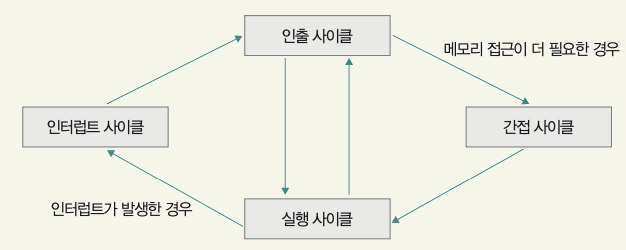
    - 인출 사이클: 메모리에 있는 명령어를 CPU로 가지고 오는 단계
    - 실행 사이클: CPU가 명령어를 해석하고 실행하는 단계
    - 간접 사이클: 명령어를 실행하기 위해 추가적인 메모리 접근을 수행하는 단계
    - 인터럽트: CPU가 현재 작업을 중단하고 다른 작업을 수행하는 단계